In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, \
        dimension_reduction, \
        calc_contribution, \
        calc_contribution_rank, \
        remove_anomaly

# 1. Load Excel

In [3]:
# 1. load_excel

# data/apt_all.xlsx
# data/apt_1.xlsx
# data/apt_3.xlsx
# data/apt_4.xlsx
# data/apt_std_nugin_1_3.xlsx

data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

# 4. day clustering
copy_df = df.copy()

In [157]:
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


# 2. Run Clustering (3시간 단위로 클러스터링)

In [5]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

10 / 248 ==> 86.55030895065707
20 / 248 ==> 82.56831428828974
30 / 248 ==> 80.18101152709913
40 / 248 ==> 82.01236733656044
50 / 248 ==> 84.57381483546817
60 / 248 ==> 81.47233299070804
70 / 248 ==> 82.73795832315768
80 / 248 ==> 80.35461320627223
90 / 248 ==> 87.50932534848356
100 / 248 ==> 80.7016416898423
110 / 248 ==> 83.62554403473024
120 / 248 ==> 79.25775371809132
130 / 248 ==> 87.60643344332483
140 / 248 ==> 81.72069717851215
150 / 248 ==> 84.42606319357783
160 / 248 ==> 88.78028010164857
170 / 248 ==> 88.23888847747746
180 / 248 ==> 81.62210377886174
190 / 248 ==> 80.43095667135671
200 / 248 ==> 85.23662566630499
210 / 248 ==> 85.68818073510243
220 / 248 ==> 84.97970406567555
230 / 248 ==> 82.85458186209296
240 / 248 ==> 84.05202953352335
248 / 248 ==> 81.367779242683


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,2.0,4.0,2.0,6.0,6.0,1.0,4.0,5.0,5.0,4.0,...,2.0,4.0,2.0,2.0,0.0,0.0,4.0,4.0,5.0,2.0
1,2.0,4.0,5.0,0.0,0.0,4.0,4.0,5.0,4.0,4.0,...,4.0,4.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,1.0
2,5.0,3.0,3.0,3.0,3.0,5.0,6.0,5.0,5.0,5.0,...,3.0,2.0,1.0,6.0,0.0,6.0,6.0,5.0,1.0,6.0
3,0.0,3.0,3.0,3.0,3.0,0.0,4.0,0.0,1.0,3.0,...,3.0,1.0,4.0,2.0,2.0,2.0,3.0,4.0,4.0,2.0
4,3.0,5.0,4.0,4.0,4.0,3.0,0.0,0.0,6.0,5.0,...,0.0,6.0,6.0,6.0,2.0,0.0,5.0,3.0,3.0,2.0


# 3. Contribution Map

In [14]:
contribution_df = calc_contribution_rank(hc, ci)
contribution_df.index = df.index[::size] 

contribution_df.head()

rank!


,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,5.0,3.0,5.0,1.0,1.0,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,5.0,5.0,6.0,6.0,3.0,3.0,4.0,5.0
2018-05-01 03:00:00,4.0,2.0,3.0,1.0,1.0,2.0,2.0,3.0,2.0,2.0,...,2.0,2.0,5.0,2.0,5.0,3.0,3.0,2.0,3.0,5.0
2018-05-01 06:00:00,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,...,1.0,6.0,6.0,3.0,4.0,3.0,3.0,2.0,6.0,3.0
2018-05-01 09:00:00,2.0,1.0,1.0,1.0,1.0,2.0,3.0,2.0,6.0,1.0,...,1.0,6.0,3.0,5.0,5.0,5.0,1.0,3.0,3.0,5.0
2018-05-01 12:00:00,3.0,2.0,1.0,1.0,1.0,3.0,4.0,4.0,6.0,2.0,...,4.0,6.0,6.0,6.0,7.0,4.0,2.0,3.0,3.0,7.0


# 4. Remove Anomaly Contribution Household

In [21]:
cont_mean_df = remove_anomaly(df, contribution_df)

cont_mean_df.head()

,contribution
아파트1-104-1206,2.0
아파트1-104-303,2.0
아파트1-104-1307,2.0
아파트1-104-1208,1.0
아파트1-104-408,1.0


# 5. 각 기여도 그룹별로 많이 속해있었던 클러스터링을 해당 기여도 그룹의 대표 클러스터링으로 산출

In [89]:
# Cluster by Contribution GroupBy
cc = pd.DataFrame()
cont_group = set(cont_mean_df.values.flatten())

for group in cont_group:
    group_cols = cont_mean_df[cont_mean_df['contribution'] == group].index
    _hc = hc[group_cols].T.copy()
    _clusters = np.array([])
    
    for idx in range(0, len(hc)):
        _group = _hc[idx].groupby(_hc[idx]).count()
        max_cluster = _group.argmax()

        _clusters = np.append(_clusters,
                              _group.keys()[max_cluster])
    
    cc["기여도 그룹 {}".format(int(group))] = _clusters
    
cc.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
0,6.0,1.0,4.0,0.0,2.0,3.0
1,0.0,4.0,4.0,5.0,1.0,1.0
2,3.0,5.0,6.0,6.0,6.0,1.0
3,3.0,3.0,0.0,0.0,2.0,2.0
4,4.0,5.0,0.0,0.0,0.0,2.0


# 6. Pattern Matching

In [132]:
cc_cols = cc.columns
_cc_pattern = np.array([])

for cc_col in cc_cols:
    _cc = cc[cc_col]
    for division_round, _cc in enumerate(_cc):
        _round_pattern = ci[division_round][0][int(_cc)]
        
        _cc_pattern = np.append(_cc_pattern,_round_pattern)
        
cc_pattern = pd.DataFrame(_cc_pattern.reshape(-1,len(cc) * 3),
                         index=cc_cols,
                         columns=df.index).T
cc_pattern.head()

,기여도 그룹 1,기여도 그룹 2,기여도 그룹 3,기여도 그룹 4,기여도 그룹 5,기여도 그룹 6
2018-05-01 00:00:00,0.054,0.149,0.179,0.531,0.341,0.728
2018-05-01 01:00:00,0.047,0.120,0.186,0.377,0.312,0.621
2018-05-01 02:00:00,0.042,0.122,0.194,0.336,0.314,0.530
2018-05-01 03:00:00,0.074,0.170,0.170,0.241,0.348,0.348
2018-05-01 04:00:00,0.062,0.166,0.166,0.246,0.341,0.341


# 7. Group - Cluster Pattern Visualization

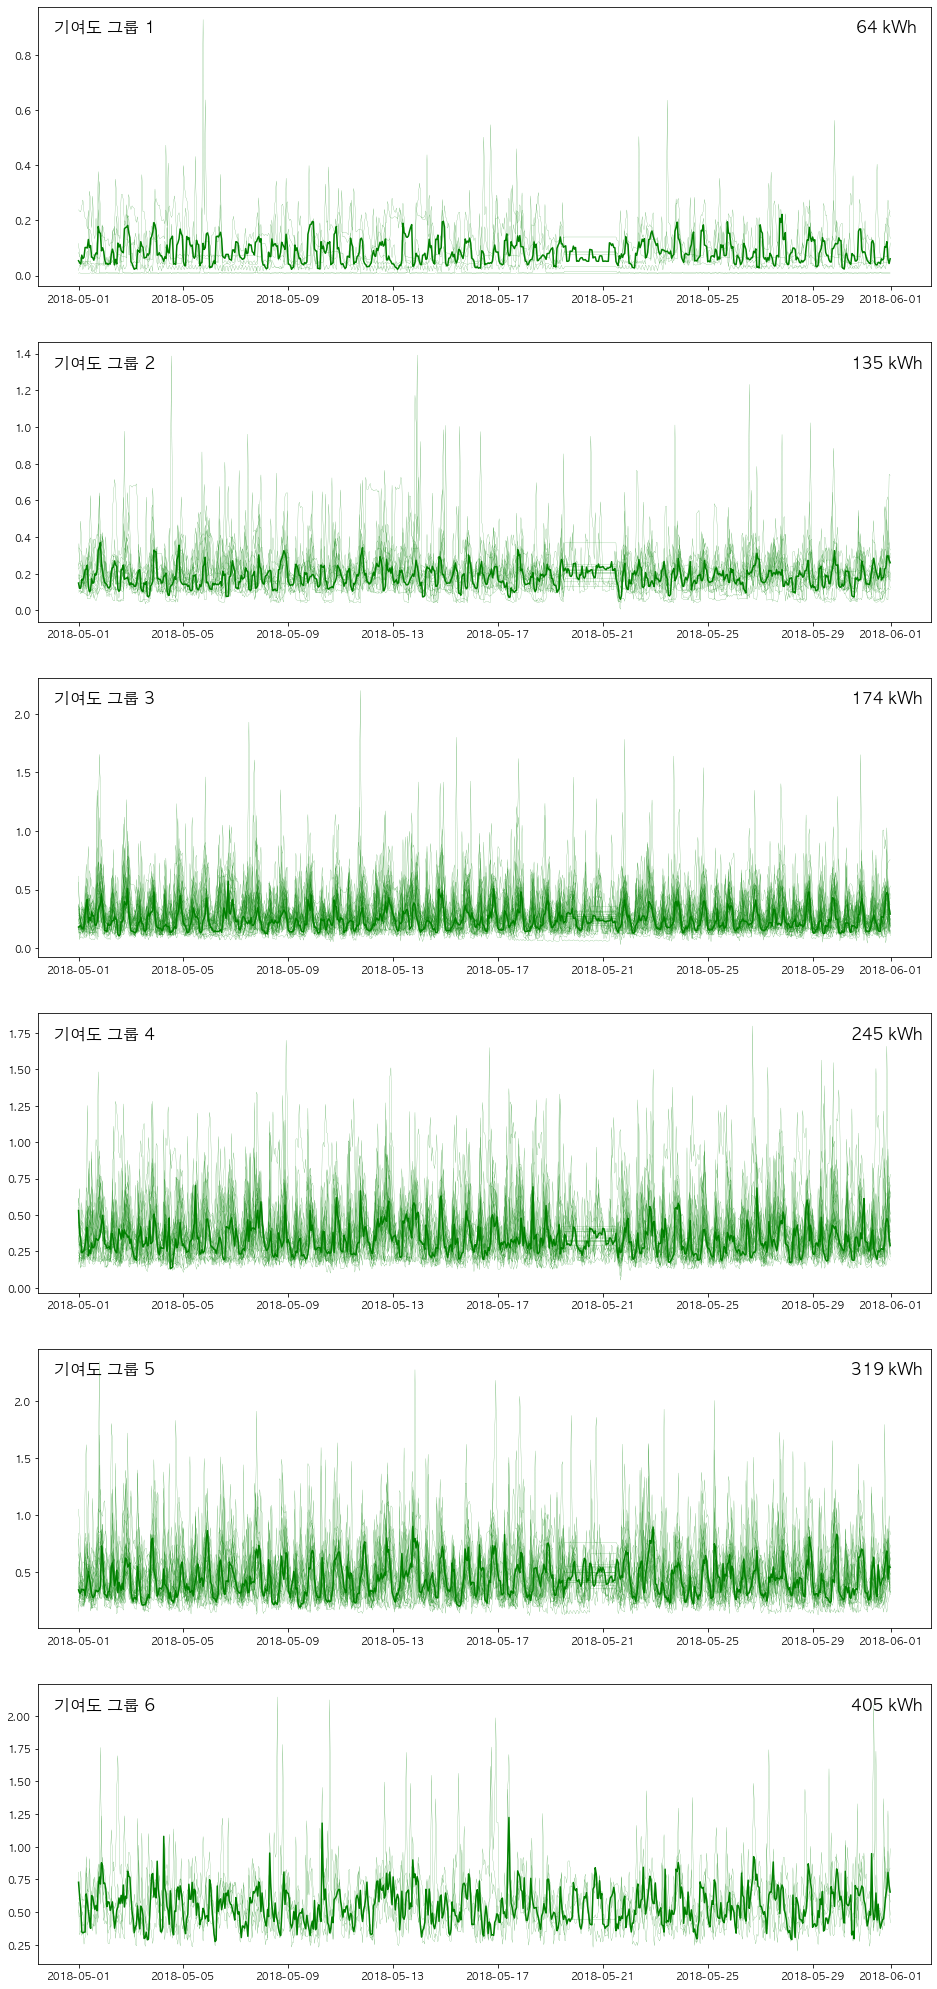

In [162]:
fig, ax = plt.subplots(len(cc_cols),1, figsize=(16, 6 * len(cc_cols)))

for group_idx,group in enumerate(cont_group):
    cols = df.columns
    _group_cols = cols[(cont_mean_df['contribution'] == group).values]

    ax[group_idx].plot(df[_group_cols], linewidth=0.15, color='g')
    ax[group_idx].plot(cc_pattern[cc_cols[group_idx]], linewidth=1.5, color='g')
    ax[group_idx].text(0.075, 0.925, cc_cols[group_idx], 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)
    ax[group_idx].text(0.95, 0.925, "{} kWh".format(round(cc_pattern[cc_cols[group_idx]].sum())), 
                       ha='center', 
                       va='center',
                       fontsize=16,
                       transform=ax[group_idx].transAxes)

plt.show()

# CRS